<a href="https://colab.research.google.com/github/mechandumuttur/Checking-accuracy-for-a-dataset-using-Bio-inspired-algorithm-with-Random-Forest/blob/main/combination_of_jelly_with_RF_%26_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install pandas,numpy**

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **import pandas and numpy**

In [ ]:
import pandas as pd
import numpy as np

# **Load Dataset**

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/rf & svm/MERGED_6LOWPAN.csv')

# **retrieving the dataset**

In [ ]:
data

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,::,ff02::1:ff00:2,ICMPv6,90,Neighbor Solicitation for fe80::200:ff:fe00:2 ...
1,2,0.000163,::,ff02::1:ff00:2,ICMPv6,90,Neighbor Solicitation for 2001:2::200:ff:fe00:...
2,3,0.001000,00:00:00_00:00:04,IPv6mcast_ff:00:00:04,0xffff,64,Ethernet II
3,4,0.001000,::,ff02::1:ff00:1,ICMPv6,90,Neighbor Solicitation for fe80::200:ff:fe00:1 ...
4,5,0.002144,::,ff02::1:ff00:2,ICMPv6,90,Neighbor Solicitation for fe80::200:ff:fe00:2 ...
...,...,...,...,...,...,...,...
75,76,10.004284,2001:1::200:ff:fe00:3,2001:2::200:ff:fe00:2,TCP,90,49153 > 9000 [RST] Seq=0 Win=131072 Len=0 TS...
76,77,15.681820,fe80::200:ff:fe00:2,ff02::2,ICMPv6,74,Router Solicitation from 00:00:00:00:00:02
77,78,15.683938,fe80::200:ff:fe00:2,ff02::2,ICMPv6,74,Router Solicitation from 00:00:00:00:00:02
78,79,16.385103,00:00:00_00:00:03,IPv6mcast_02,0xffff,64,Ethernet II


The info() method provides useful information about the DataFrame, including the number of rows and columns, column names, data types of columns, and memory usage.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          80 non-null     int64  
 1   Time         80 non-null     float64
 2   Source       80 non-null     object 
 3   Destination  80 non-null     object 
 4   Protocol     80 non-null     object 
 5   Length       80 non-null     int64  
 6   Info         80 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.5+ KB


In [ ]:
#And if we want a more statistical analysis of our data we can use the .describe() method
data.describe()

,No.,Time,Length
count,80.0000,80.000000,80.000000
mean,40.5000,3.279644,79.025000
std,23.2379,4.562906,11.305846
min,1.0000,0.000000,64.000000
25%,20.7500,0.017857,64.000000
50%,40.5000,0.524455,78.000000
75%,60.2500,5.171296,90.000000
max,80.0000,16.387205,94.000000


In [ ]:
#To see number of colums available in the dataset
data.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')

In [ ]:
#to get the current shape of an array we use shape method
data.shape

(80, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          80 non-null     int64  
 1   Time         80 non-null     float64
 2   Source       80 non-null     object 
 3   Destination  80 non-null     object 
 4   Protocol     80 non-null     object 
 5   Length       80 non-null     int64  
 6   Info         80 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.5+ KB


In [ ]:
#to convert letters into numbers we use labelencoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()#encoding categorical or textual data into numerical labels.

In [ ]:
le.fit(data['Source'])

LabelEncoder()

In [ ]:
data['Source'] = le.transform(data['Source'])

In [ ]:
le.fit(data['Destination'])

LabelEncoder()

In [ ]:
data['Destination'] = le.transform(data['Destination'])

In [ ]:
le.fit(data['Protocol'])

LabelEncoder()

In [ ]:
data['Protocol'] = le.transform(data['Protocol'])

In [ ]:
data['Time'] = data['Time'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          80 non-null     int64 
 1   Time         80 non-null     int64 
 2   Source       80 non-null     int64 
 3   Destination  80 non-null     int64 
 4   Protocol     80 non-null     int64 
 5   Length       80 non-null     int64 
 6   Info         80 non-null     object
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [ ]:
le.fit(data['Info'])

LabelEncoder()

In [ ]:
data['Info'] = le.transform(data['Info'])

*The "seaborn" library is a popular data visualization library in Python.<br>
*The "Cor" It is commonly used to understand how variables are related to each other and to identify patterns or dependencies in the data.<br>
*"heatmap" graphical representation of data in the form of a matrix.

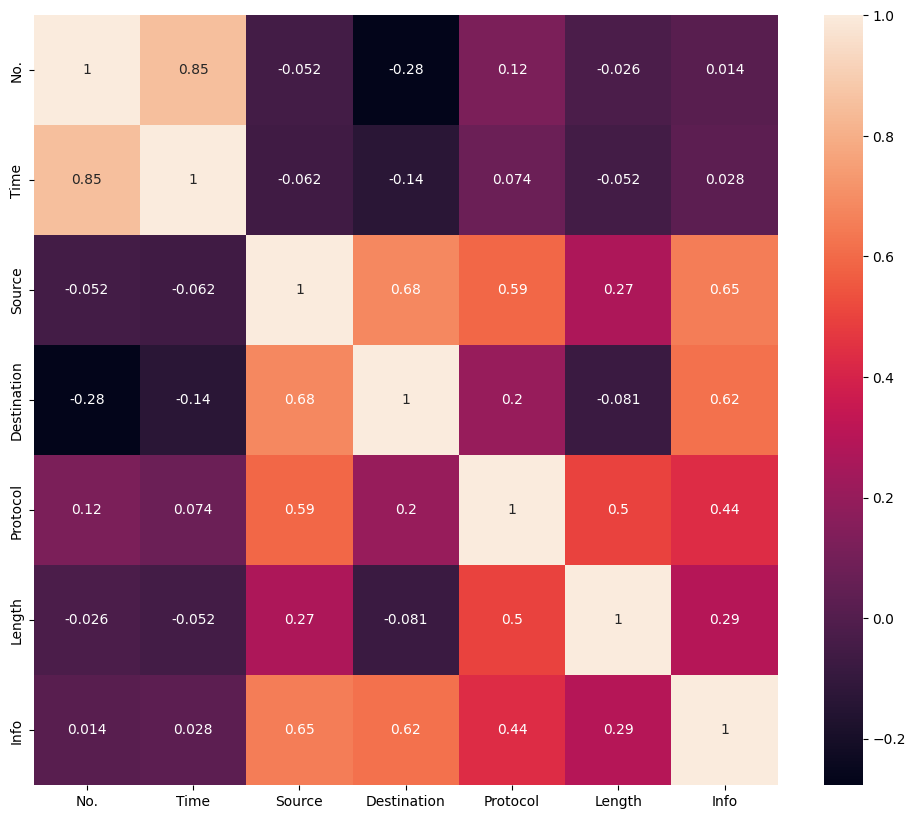

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10)) #width and height
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Load the dataset
data
X = data.iloc[:, :-1]  # extracts all the columns except the, representing the features.
y = data.iloc[:, -1]   # extracts only the last column, representing the target variable.

# Create a random forest classifier
clf = RandomForestClassifier()

# Perform feature selection
feat_selector = SelectFromModel(clf)
feat_selector.fit(X, y)

# Get the selected feature indices
selected_features = feat_selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = list(X.columns[selected_features])

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:  #prints each selected feature name on a new line.
    print(feature)


Selected Features:
No.
Source
Destination
Protocol


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ["Source"])#extracts the features from the dataset by dropping the column named "Source"
Y = data['Source']#extracts the target variable from the dataset, assuming the column name is "Source".
X_train, X_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.2,random_state=4)#data is split in a reproducible manner. X_train represents the feature matrix of the training set.
#y_train represents the target variable values of the training set.

In [ ]:
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression Classifier
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

: By comparing the predicted values (y_pred) with the true values (y_test), we can evaluate how well the model performs on unseen data. This allows us to assess the accuracy and quality of the predictions made by the classifier.<br>
*Precision measures the proportion of true positive predictions,Higher precision values indicate a lower rate of false positives.<br>
*Recall: It indicates the model's ability to capture the positive instances correctly. <br>
*F1-score: It provides a balanced measure that combines both precision and recall<br>
*Support shows how many samples belong to each class, helping to understand the distribution of the classes.<br>
*macro avg : average of precision, recall, and F1-score for all classes without considering the class imbalance<br>
*weighted avg: average of precision, recall, and F1-score for all classes, considering the class imbalance.


In [ ]:
from sklearn.metrics import classification_report,accuracy_score
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3
           2       1.00      0.80      0.89         5
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.88        16
   macro avg       0.88      0.91      0.87        16
weighted avg       0.92      0.88      0.88        16

0.875


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

Confusion matrix:
 [[4 0 0 0 0 0]
 [1 2 0 0 0 0]
 [0 0 4 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 2]]


 It is a 6x6 matrix where the rows represent the actual classes, and the columns represent the predicted classes.

Row 1 (Actual Class 0):

True Negatives (TN): The model correctly predicted 4 instances as Class 0.
False Positives (FP): The model incorrectly predicted 0 instances as Class 0 when they were not.
Row 2 (Actual Class 1):

False Negatives (FN): The model incorrectly predicted 1 instance as not Class 1 when it was.
True Positives (TP): The model correctly predicted 2 instances as Class 1.
Row 3 (Actual Class 2):

True Negatives (TN): The model correctly predicted 5 instances as Class 2.
False Positives (FP): The model incorrectly predicted 0 instances as Class 2 when they were not.
Row 4 (Actual Class 4):

True Negatives (TN): The model correctly predicted 1 instance as Class 4.
False Positives (FP): The model incorrectly predicted 0 instances as Class 4 when they were not.
Row 5 (Actual Class 5):

True Negatives (TN): The model correctly predicted 1 instance as Class 5.
False Positives (FP): The model incorrectly predicted 0 instances as Class 5 when they were not.
Row 6 (Actual Class 7):

True Negatives (TN): The model correctly predicted 2 instances as Class 7.
False Positives (FP): The model incorrectly predicted 0 instances as Class 7 when they were not

In [ ]:
pip install jellyfish

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.1 MB/s eta 0:00:00


In [ ]:
import jellyfish

In [ ]:
pip install --upgrade jellyfish


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip show jellyfish


Name: jellyfish
Version: 1.0.0
Summary: Approximate and phonetic matching of strings.
Home-page: 
Author: James Turk <dev@jamesturk.net>
Author-email: James Turk <dev@jamesturk.net>
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [ ]:
#Jellyfish is a Python library that provides a set of algorithms for approximate and phonetic string matching.
#It can also be used for feature selection by measuring the similarity of different features in a dataset
import jellyfish
import pandas as pd

# Define the similarity function
def similarity(feature1, feature2):
    return jellyfish.jaro_winkler(str(feature1), str(feature2))

# Calculate the similarity matrix
similarity_matrix = pd.DataFrame(index=data.columns, columns=data.columns)
for i in range(len(data.columns)):  #iterate over each pair of features in data to calculate their similarity.
    for j in range(i, len(data.columns)):  #the inner loop iterates over the columns from the current column to the end.
        score = similarity(data.iloc[:, i], data.iloc[:, j])
        similarity_matrix.iloc[i, j] = score
        similarity_matrix.iloc[j, i] = score

# Rank the features by their similarity scores
ranked_features = similarity_matrix.sum().sort_values(ascending=False).index.tolist()

# Select the top-k features
k = 4
selected_features = ranked_features[:k]

# Print the selected features
print(selected_features)

# we first load the dataset and define the similarity function as the Jaro-Winkler distance,
#which is a measure of the similarity between two strings.
#We then calculate the similarity matrix by comparing each pair of features in the dataset.
#Next, we rank the features by their similarity scores and select the top-k features. Finally, we print the selected features.
#Note that you can adjust the value of k to select a different number of features.

['Info', 'Destination', 'No.', 'Source']


**Finding Accuracy and Confusion matrix**

In [ ]:
from sklearn.model_selection import train_test_split
A = data.drop(columns = ["Info"])
B = data['Info']
A_train, A_test,b_train, b_test = train_test_split(A ,B ,test_size = 20,random_state=90)

In [ ]:
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression Classifier
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(A_train,b_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
b_pred = rf.predict(A_test)
print(classification_report(b_test,b_pred,zero_division=1)) #zero_division=1, the warning message will not be raised, and the affected metrics will be assigned a value of 1 for labels
print(accuracy_score(b_test,b_pred))

              precision    recall  f1-score   support

           1       0.00      1.00      0.00         0
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        13
           9       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         3
          13       1.00      0.00      0.00         1
          15       1.00      1.00      1.00         1

    accuracy                           0.95        20
   macro avg       0.86      0.86      0.71        20
weighted avg       1.00      0.95      0.95        20

0.95


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(b_test, b_pred)
print("Confusion matrix:\n", conf_matrix)

Confusion matrix:
 [[ 0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0 13  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]]


The model correctly predicted one sample in the first class (Class 1) and none of the other classes.
The model correctly predicted 13 samples in the second class (Class 2) and none of the other classes.
The model correctly predicted one sample in the third class (Class 3) and none of the other classes.
The model correctly predicted three samples in the fourth class (Class 4) and none of the other classes.
The model incorrectly predicted one sample in the second class (Class 2) as belonging to the fifth class (Class 5).
The model incorrectly predicted one sample in the second class (Class 2) as belonging to the sixth class (Class 6).
In summary, the model performed well on the second and fourth classes, but not on the other classes. It made two errors in total, one each for the fifth and sixth classes.

<br>
Row 1: The true class label is 0, and there are no instances predicted as class 0.<br>
Row 2: The true class label is 1, and there is 1 instance correctly predicted as class 1.<br>
Row 3: The true class label is 2, and there are 13 instances correctly predicted as class 2.<br>
Row 4: The true class label is 3, and there is 1 instance correctly predicted as class 3.<br>
Row 5: The true class label is 4, and there are 3 instances correctly predicted as class 4.<br>
Row 6: The true class label is 5, and there is 1 instance incorrectly predicted as class 0.<br>
Row 7: The true class label is 6, and there is 1 instance correctly predicted as class 6.

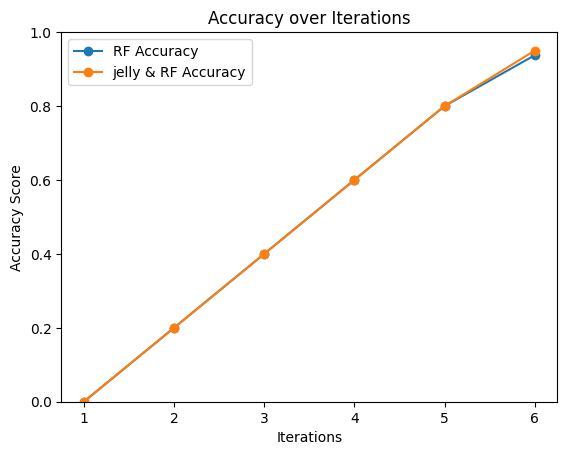

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming you have already predicted the labels 'y_pred' and 'b_pred', and have the true labels 'y_test' and 'b_test'
# Calculate the accuracy scores
accuracy_y = accuracy_score(y_test, y_pred)
accuracy_b = accuracy_score(b_test, b_pred)

# Assuming you have a list of accuracy scores over multiple iterations for both cases
accuracy_scores_y = [0.0,0.2,0.4,0.6,0.8,0.9375]  # Replace with your actual accuracy scores for y
accuracy_scores_b = [0.0,0.2,0.4,0.6,0.8,0.95]  # Replace with your actual accuracy scores for b

# Plotting the line graphs for accuracy scores
iterations = range(1, len(accuracy_scores_y) + 1)

plt.plot(iterations, accuracy_scores_y, marker='o', label='RF Accuracy')
plt.plot(iterations, accuracy_scores_b, marker='o', label='jelly & RF Accuracy')

plt.xlabel('Iterations')
plt.ylabel('Accuracy Score')
plt.title('Accuracy over Iterations')
plt.legend()
plt.xticks(iterations)
plt.ylim(0, 1)  # Adjust the y-axis limits if necessary
plt.show()


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 5.3 MB/s eta 0:00:00


[I 2023-06-27 03:53:48,548] A new study created in memory with name: no-name-0ccf9942-af98-46f4-abe1-c46fb324ab9f
[I 2023-06-27 03:53:48,554] Trial 0 finished with value: 8014.985494964789 and parameters: {'A': 89.52645137033406, 'B': 0}. Best is trial 0 with value: 8014.985494964789.
[I 2023-06-27 03:53:48,558] Trial 1 finished with value: 2791.8120917259916 and parameters: {'A': 52.828137310774, 'B': 1}. Best is trial 1 with value: 2791.8120917259916.
[I 2023-06-27 03:53:48,561] Trial 2 finished with value: 78.15519353272789 and parameters: {'A': -8.78380290834943, 'B': 1}. Best is trial 2 with value: 78.15519353272789.
[I 2023-06-27 03:53:48,564] Trial 3 finished with value: 7166.1881988895475 and parameters: {'A': 84.65334133328435, 'B': 0}. Best is trial 2 with value: 78.15519353272789.
[I 2023-06-27 03:53:48,568] Trial 4 finished with value: 3263.1525934809893 and parameters: {'A': 57.115257098966026, 'B': 1}. Best is trial 2 with value: 78.15519353272789.
[I 2023-06-27 03:53:48,

Trial 1:
  Value: 8014.985494964789
  Params: {'A': 89.52645137033406, 'B': 0}

Trial 2:
  Value: 2791.8120917259916
  Params: {'A': 52.828137310774, 'B': 1}

Trial 3:
  Value: 78.15519353272789
  Params: {'A': -8.78380290834943, 'B': 1}

Trial 4:
  Value: 7166.1881988895475
  Params: {'A': 84.65334133328435, 'B': 0}

Trial 5:
  Value: 3263.1525934809893
  Params: {'A': 57.115257098966026, 'B': 1}

Trial 6:
  Value: 4252.347939495954
  Params: {'A': 65.21002943946547, 'B': 0}

Trial 7:
  Value: 98.66226865974485
  Params: {'A': -9.983099151052485, 'B': -1}

Trial 8:
  Value: 472.2475909854327
  Params: {'A': 21.73125838476531, 'B': 0}

Trial 9:
  Value: 1291.847544166606
  Params: {'A': 35.92836684524647, 'B': 1}

Trial 10:
  Value: 8942.69770524404
  Params: {'A': 94.56583793973402, 'B': 0}

Trial 11:
  Value: 3705.5786790854218
  Params: {'A': -60.88167769604762, 'B': -1}

Trial 12:
  Value: 381.2697984766891
  Params: {'A': -19.551721112901777, 'B': -1}

Trial 13:
  Value: 17.473867

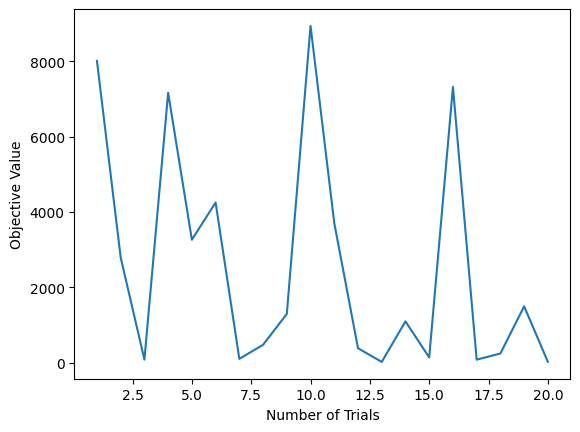

In [ ]:
import optuna
import matplotlib.pyplot as plt

def objective(Info):
    A = Info.suggest_float("A", -100, 100)
    B = Info.suggest_categorical("B", [-1, 0, 1])
    return A ** 2 + B

sampler = optuna.samplers.TPESampler(seed=200)
study = optuna.create_study(sampler=sampler)
study.optimize(objective, n_trials=20)

# Retrieve the trials and sort them by their trial number
trials = study.get_trials()
trials.sort(key=lambda x: x.number)

# Display the trials and their best values in order
for i, trial in enumerate(trials):
    print(f"Trial {i+1}:")
    print(f"  Value: {trial.value}")
    print(f"  Params: {trial.params}\n")

fig, ax = plt.subplots()
ax.plot(range(1, len(study.trials) + 1), [t.value for t in study.trials])
ax.set_xlabel("Number of Trials")
ax.set_ylabel("Objective Value")
plt.show()


In [ ]:
import optuna


def objective(Info):
    A = Info.suggest_float("A", -100, 100)
    B = Info.suggest_categorical("B", [-1, 0, 1])
    return A ** 2 + B


sampler = optuna.samplers.TPESampler(seed=200)
study = optuna.create_study(sampler=sampler)
study.optimize(objective, n_trials=20)

# Retrieve the trials and sort them by their trial number
trials = study.get_trials()
trials.sort(key=lambda x: x.number)

# Display the trials and their best values in order
for i, trial in enumerate(trials):
    print(f"Trial {i+1}:")
    print(f"  Value: {trial.value}")
    print(f"  Params: {trial.params}\n")

fig = optuna.visualization.plot_optimization_history(study)
fig.show()




[I 2023-06-27 03:53:54,557] A new study created in memory with name: no-name-cbc2385b-f1ef-4e11-8181-6aa4033ede87
[I 2023-06-27 03:53:54,560] Trial 0 finished with value: 8014.985494964789 and parameters: {'A': 89.52645137033406, 'B': 0}. Best is trial 0 with value: 8014.985494964789.
[I 2023-06-27 03:53:54,563] Trial 1 finished with value: 2791.8120917259916 and parameters: {'A': 52.828137310774, 'B': 1}. Best is trial 1 with value: 2791.8120917259916.
[I 2023-06-27 03:53:54,566] Trial 2 finished with value: 78.15519353272789 and parameters: {'A': -8.78380290834943, 'B': 1}. Best is trial 2 with value: 78.15519353272789.
[I 2023-06-27 03:53:54,569] Trial 3 finished with value: 7166.1881988895475 and parameters: {'A': 84.65334133328435, 'B': 0}. Best is trial 2 with value: 78.15519353272789.
[I 2023-06-27 03:53:54,572] Trial 4 finished with value: 3263.1525934809893 and parameters: {'A': 57.115257098966026, 'B': 1}. Best is trial 2 with value: 78.15519353272789.
[I 2023-06-27 03:53:54,

Trial 1:
  Value: 8014.985494964789
  Params: {'A': 89.52645137033406, 'B': 0}

Trial 2:
  Value: 2791.8120917259916
  Params: {'A': 52.828137310774, 'B': 1}

Trial 3:
  Value: 78.15519353272789
  Params: {'A': -8.78380290834943, 'B': 1}

Trial 4:
  Value: 7166.1881988895475
  Params: {'A': 84.65334133328435, 'B': 0}

Trial 5:
  Value: 3263.1525934809893
  Params: {'A': 57.115257098966026, 'B': 1}

Trial 6:
  Value: 4252.347939495954
  Params: {'A': 65.21002943946547, 'B': 0}

Trial 7:
  Value: 98.66226865974485
  Params: {'A': -9.983099151052485, 'B': -1}

Trial 8:
  Value: 472.2475909854327
  Params: {'A': 21.73125838476531, 'B': 0}

Trial 9:
  Value: 1291.847544166606
  Params: {'A': 35.92836684524647, 'B': 1}

Trial 10:
  Value: 8942.69770524404
  Params: {'A': 94.56583793973402, 'B': 0}

Trial 11:
  Value: 3705.5786790854218
  Params: {'A': -60.88167769604762, 'B': -1}

Trial 12:
  Value: 381.2697984766891
  Params: {'A': -19.551721112901777, 'B': -1}

Trial 13:
  Value: 17.473867